# Plano de Trabalho: Lung Cancer Dataset (Kaggle)

## 1. Compreensão e exploração inicial
- Revisar a documentação e as colunas disponíveis.
- Calcular estatísticas básicas (média, mediana, desvio padrão, percentis).
- Visualizar distribuições das variáveis-chave (histogramas, boxplots).
- Analisar correlações entre variáveis numéricas e com a variável alvo.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
path = 'Lung Cancer.csv'
df = pd.read_csv(path).iloc[:,1:]
df.head()

,age,gender,country,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
0,64.0,Male,Sweden,2016-04-05,Stage I,Yes,Passive Smoker,29.4,199,0,0,1,0,Chemotherapy,2017-09-10,0
1,50.0,Female,Netherlands,2023-04-20,Stage III,Yes,Passive Smoker,41.2,280,1,1,0,0,Surgery,2024-06-17,1
2,65.0,Female,Hungary,2023-04-05,Stage III,Yes,Former Smoker,44.0,268,1,1,0,0,Combined,2024-04-09,0
3,51.0,Female,Belgium,2016-02-05,Stage I,No,Passive Smoker,43.0,241,1,1,0,0,Chemotherapy,2017-04-23,0
4,37.0,Male,Luxembourg,2023-11-29,Stage I,No,Passive Smoker,19.7,178,0,0,0,0,Combined,2025-01-08,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 890000 entries, 0 to 889999
Data columns (total 16 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   age                 890000 non-null  float64
 1   gender              890000 non-null  object 
 2   country             890000 non-null  object 
 3   diagnosis_date      890000 non-null  object 
 4   cancer_stage        890000 non-null  object 
 5   family_history      890000 non-null  object 
 6   smoking_status      890000 non-null  object 
 7   bmi                 890000 non-null  float64
 8   cholesterol_level   890000 non-null  int64  
 9   hypertension        890000 non-null  int64  
 10  asthma              890000 non-null  int64  
 11  cirrhosis           890000 non-null  int64  
 12  other_cancer        890000 non-null  int64  
 13  treatment_type      890000 non-null  object 
 14  end_treatment_date  890000 non-null  object 
 15  survived            890000 non-nul

In [4]:
df.describe()

,age,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived
count,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000,890000.000000
mean,55.007008,30.494172,233.633916,0.750024,0.469740,0.225956,0.088157,0.220229
std,9.994485,8.368539,43.432278,0.432999,0.499084,0.418211,0.283524,0.414401
min,4.000000,16.000000,150.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,23.300000,196.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,55.000000,30.500000,242.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,62.000000,37.700000,271.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,104.000000,45.000000,300.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- nao há dados repetidos

In [5]:
df.duplicated().sum()

0

In [6]:
df = df.sample(100000,random_state=42)

- mudamos o tipo de dado do target de int64 para a category

In [7]:
df['survived'] = df['survived'].astype('category')
df['hypertension'] = df['hypertension'].astype('category')
df['asthma'] = df['asthma'].astype('category')
df['cirrhosis'] = df['cirrhosis'].astype('category')
df['other_cancer'] = df['other_cancer'].astype('category')

- variaveis tipo object para date diagnosis_date, end_treatment_date, e criamos uma nova variavel tempo_de_tratamento

- As variaveis diagnosis_date e end_treatment_date, por elas mesmas só indicam o tempo de inicio e do fim do tratamento 
  mas é mais importante a duracao do tratamento por isso é que criamos a variavel treatment duration

In [8]:
df['diagnosis_date'] = pd.to_datetime(df['diagnosis_date'] )
df['end_treatment_date'] = pd.to_datetime(df['end_treatment_date'])
time = ((df['end_treatment_date'] - df['diagnosis_date']).dt.days).map(lambda x : int(x))
df.insert(3, 'treatment duration', time)
df['treatment duration'] = pd.to_numeric(df['treatment duration'], errors='coerce')

df.head()

,age,gender,country,treatment duration,diagnosis_date,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,end_treatment_date,survived
773684,37.0,Male,Lithuania,594,2015-09-30,Stage II,No,Current Smoker,34.5,241,0,0,0,0,Surgery,2017-05-16,0
278119,63.0,Female,Hungary,618,2024-04-01,Stage III,No,Passive Smoker,22.2,162,1,1,0,0,Combined,2025-12-10,0
810422,63.0,Female,Belgium,565,2015-05-08,Stage III,No,Former Smoker,22.8,230,0,0,1,0,Combined,2016-11-23,1
443587,71.0,Male,Denmark,623,2014-10-05,Stage II,No,Never Smoked,32.1,293,0,0,0,0,Chemotherapy,2016-06-19,1
701478,45.0,Female,Cyprus,576,2015-07-05,Stage I,No,Current Smoker,29.0,173,1,0,0,0,Surgery,2017-01-31,0


- Removemos as variaveis diagnosis_date e end_treatment_date

In [9]:
df.drop(['diagnosis_date', 'end_treatment_date'], axis=1, inplace=True)
df.head()

,age,gender,country,treatment duration,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
773684,37.0,Male,Lithuania,594,Stage II,No,Current Smoker,34.5,241,0,0,0,0,Surgery,0
278119,63.0,Female,Hungary,618,Stage III,No,Passive Smoker,22.2,162,1,1,0,0,Combined,0
810422,63.0,Female,Belgium,565,Stage III,No,Former Smoker,22.8,230,0,0,1,0,Combined,1
443587,71.0,Male,Denmark,623,Stage II,No,Never Smoked,32.1,293,0,0,0,0,Chemotherapy,1
701478,45.0,Female,Cyprus,576,Stage I,No,Current Smoker,29.0,173,1,0,0,0,Surgery,0


- A variavel country so representa uma quantidade de pessoas mas como nao existe outra variavel relacionada tipo qualidade
  de vida para representar melhor a informacao de country vamos observar como é a distribuicao com relacao ao target 

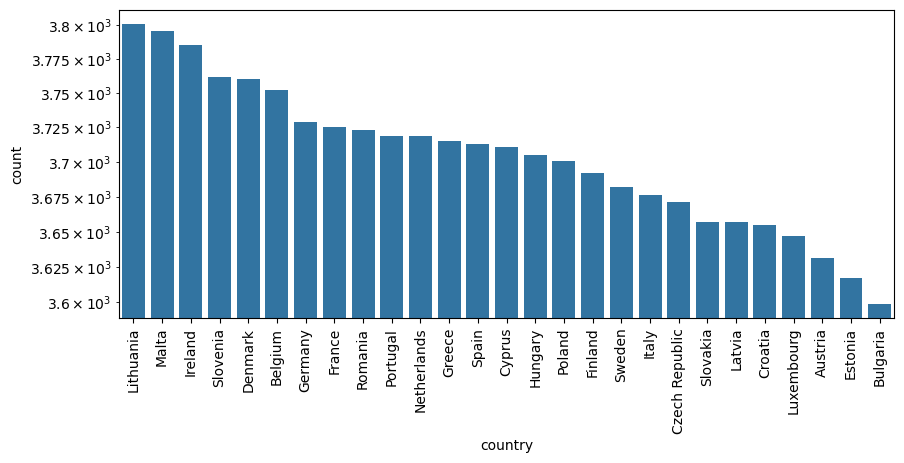

In [10]:
plt.figure(figsize=(10,4))
order = df['country'].value_counts().index
sns.countplot(x='country', data=df,order=order)
plt.yscale("log")
plt.xticks(rotation=90) 
plt.show()

-insight 1 : pode ser que variaveis geograficas sejam condicionantes para aumentar o numero de casos de
        cancer de pulmao mas essa informacao nao esta presente no dataset

/tmp/ipykernel_211072/3229905768.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = df.groupby(['country', 'survived']).size().unstack()


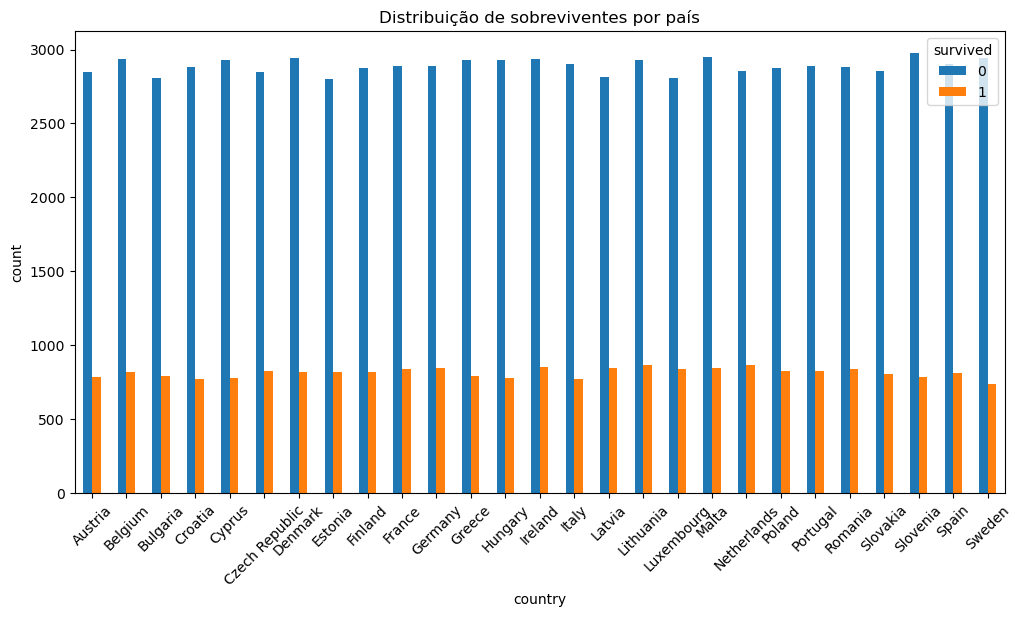

In [11]:
dist = df.groupby(['country', 'survived']).size().unstack()
dist.plot(kind='bar', figsize=(12,6))
plt.title("Distribuição de sobreviventes por país")
plt.xticks(rotation=45)
plt.ylabel("count")
plt.show()

- Observamos que em cada pais o nivel de desbalco da variabel alvo é parecido 

/tmp/ipykernel_211072/2357541182.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = df.groupby(['country', 'survived'])['age'].mean().unstack()


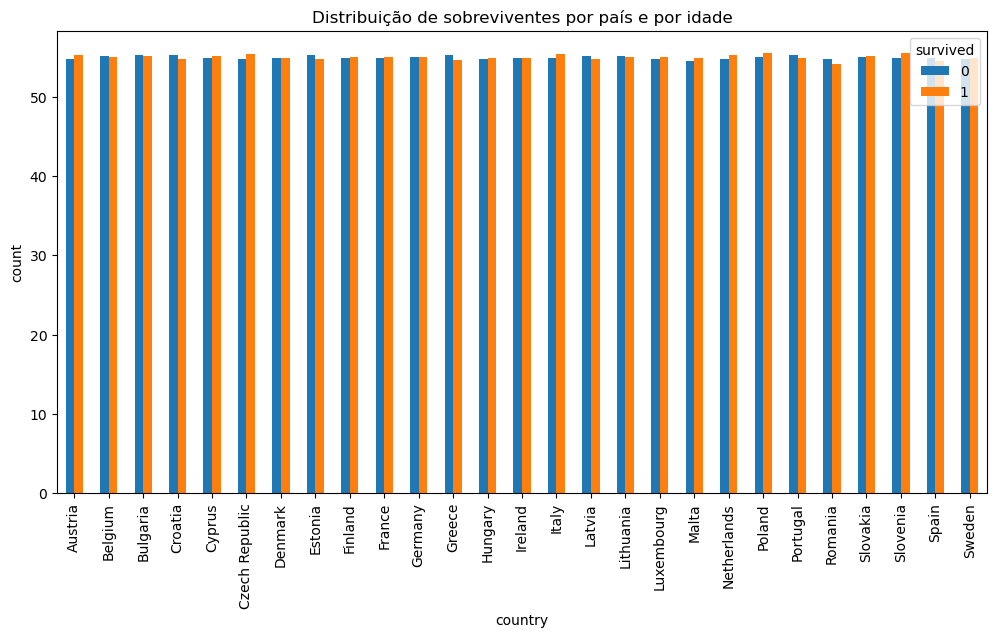

In [12]:
dist = df.groupby(['country', 'survived'])['age'].mean().unstack()
dist.plot(kind='bar', figsize=(12,6))
plt.title("Distribuição de sobreviventes por país e por idade")
plt.xticks(rotation=90)
plt.ylabel("count")
plt.show()

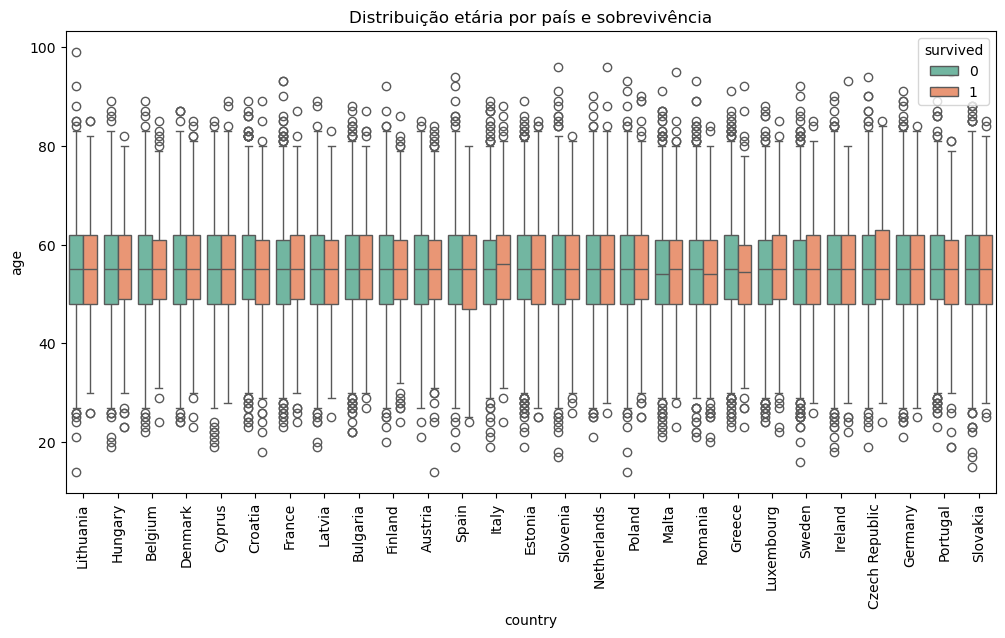

In [13]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x="country", y="age", hue="survived", palette="Set2")
plt.title("Distribuição etária por país e sobrevivência")
plt.xticks(rotation=90)
plt.show()

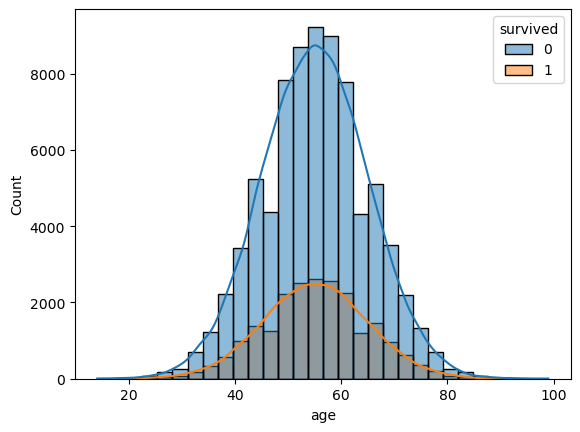

In [14]:
sns.histplot(data=df, x="age",hue='survived', bins=30, kde=True)
plt.show()

- Removemos a variavel country

In [15]:
df.drop(['country'], axis=1, inplace=True)
df.head()

,age,gender,treatment duration,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
773684,37.0,Male,594,Stage II,No,Current Smoker,34.5,241,0,0,0,0,Surgery,0
278119,63.0,Female,618,Stage III,No,Passive Smoker,22.2,162,1,1,0,0,Combined,0
810422,63.0,Female,565,Stage III,No,Former Smoker,22.8,230,0,0,1,0,Combined,1
443587,71.0,Male,623,Stage II,No,Never Smoked,32.1,293,0,0,0,0,Chemotherapy,1
701478,45.0,Female,576,Stage I,No,Current Smoker,29.0,173,1,0,0,0,Surgery,0


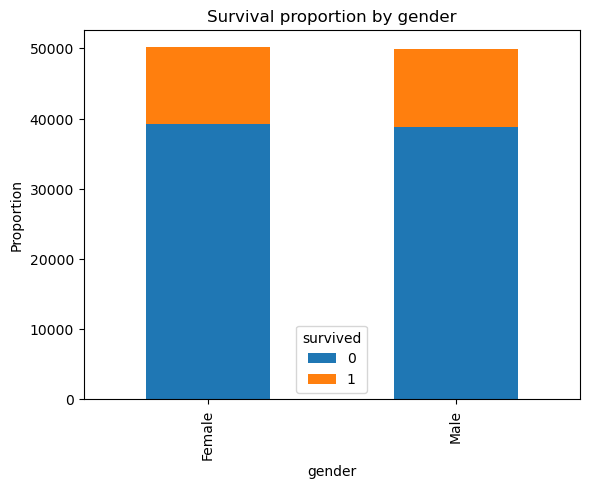

In [16]:
ct = pd.crosstab(df['gender'], df['survived'])
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by gender")
plt.ylabel("Proportion")
plt.show()

- observamos a dist de o tempo de tratamento 

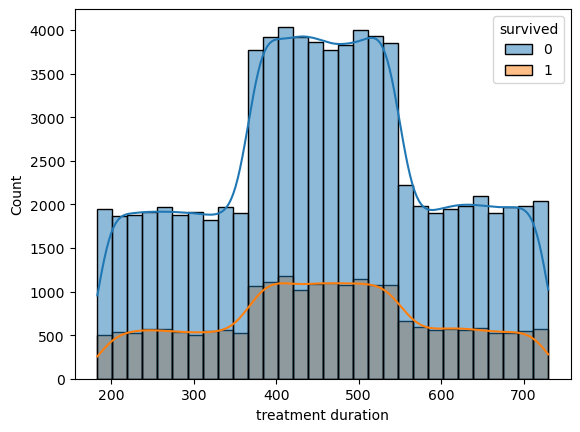

In [17]:
sns.histplot(data=df, x="treatment duration",hue='survived', bins=30, kde=True)
plt.show()

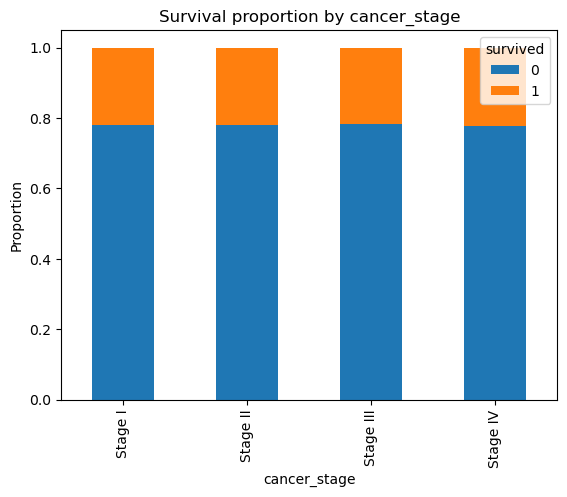

In [18]:
ct = pd.crosstab(df['cancer_stage'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by cancer_stage")
plt.ylabel("Proportion")
plt.show()

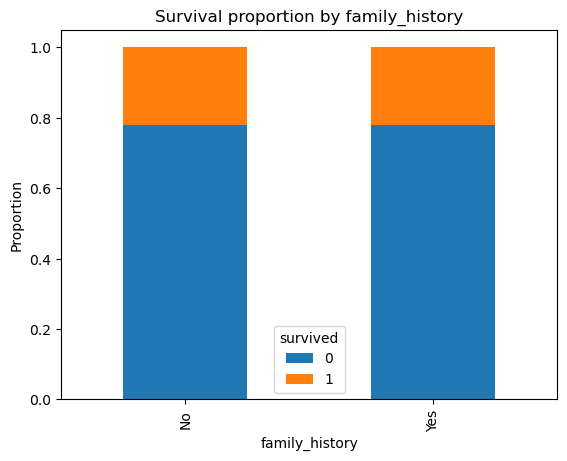

In [19]:
ct = pd.crosstab(df['family_history'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by family_history")
plt.ylabel("Proportion")
plt.show()

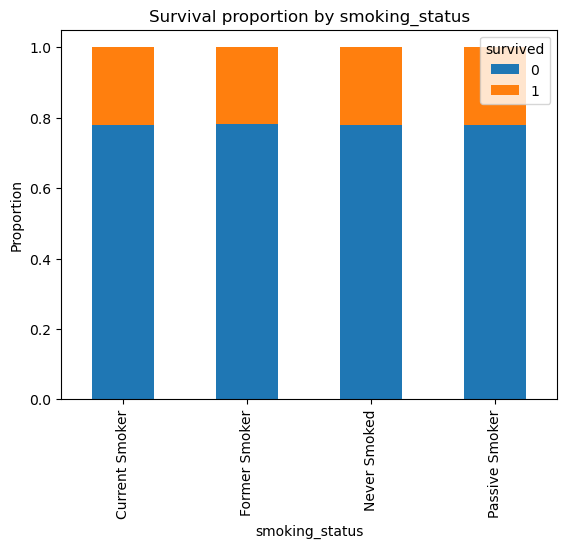

In [20]:
ct = pd.crosstab(df['smoking_status'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by smoking_status")
plt.ylabel("Proportion")
plt.show()

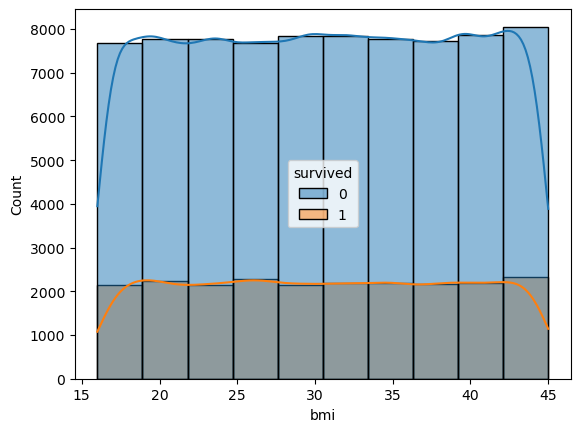

In [21]:
sns.histplot(data=df, x="bmi",hue='survived', bins=10, kde=True)
plt.show()

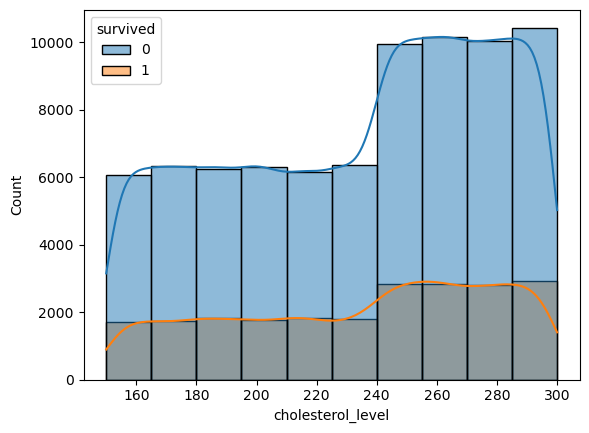

In [22]:
sns.histplot(data=df, x="cholesterol_level",hue='survived', bins=10, kde=True)
plt.show()

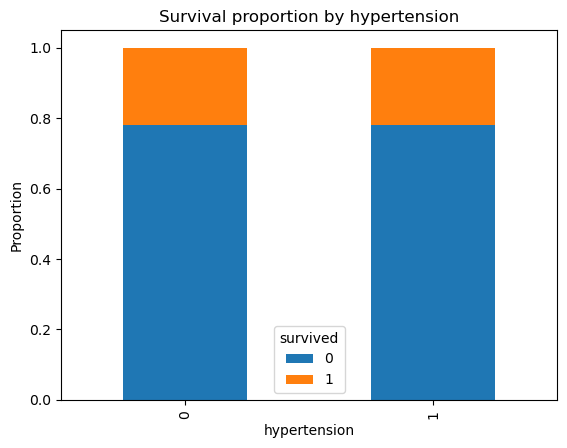

In [23]:
ct = pd.crosstab(df['hypertension'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by hypertension")
plt.ylabel("Proportion")
plt.show()

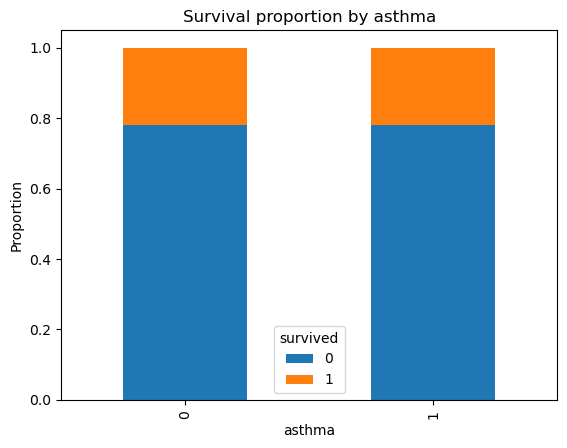

In [24]:
ct = pd.crosstab(df['asthma'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by asthma")
plt.ylabel("Proportion")
plt.show()

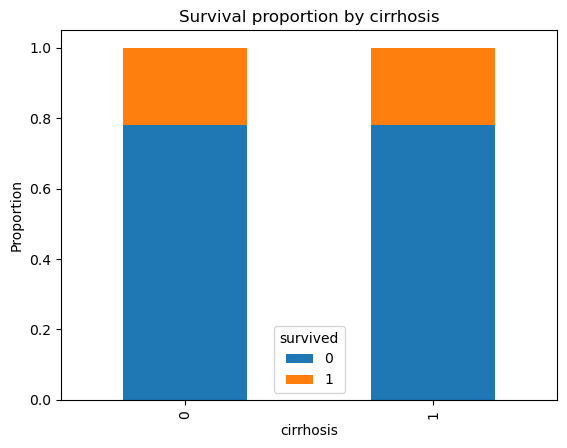

In [25]:
ct = pd.crosstab(df['cirrhosis'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by cirrhosis")
plt.ylabel("Proportion")
plt.show()

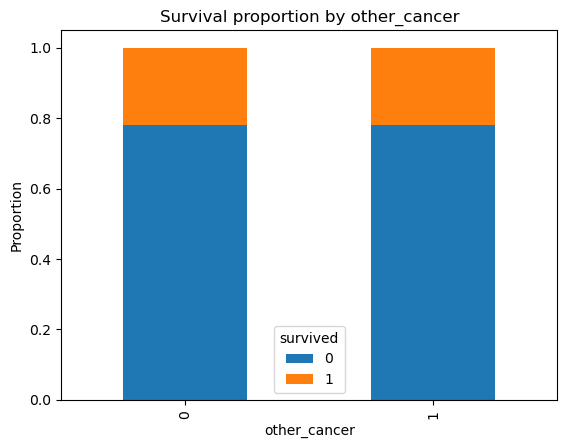

In [26]:
ct = pd.crosstab(df['other_cancer'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by other_cancer")
plt.ylabel("Proportion")
plt.show()

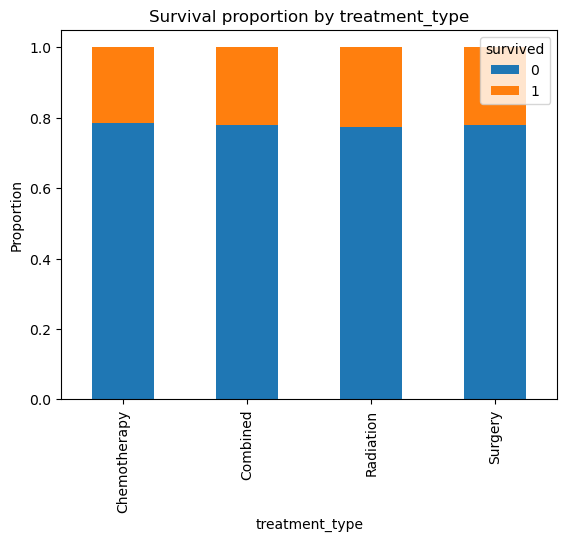

In [27]:
ct = pd.crosstab(df['treatment_type'], df['survived'], normalize='index')
ct.plot(kind="bar", stacked=True)
plt.title("Survival proportion by treatment_type")
plt.ylabel("Proportion")
plt.show()

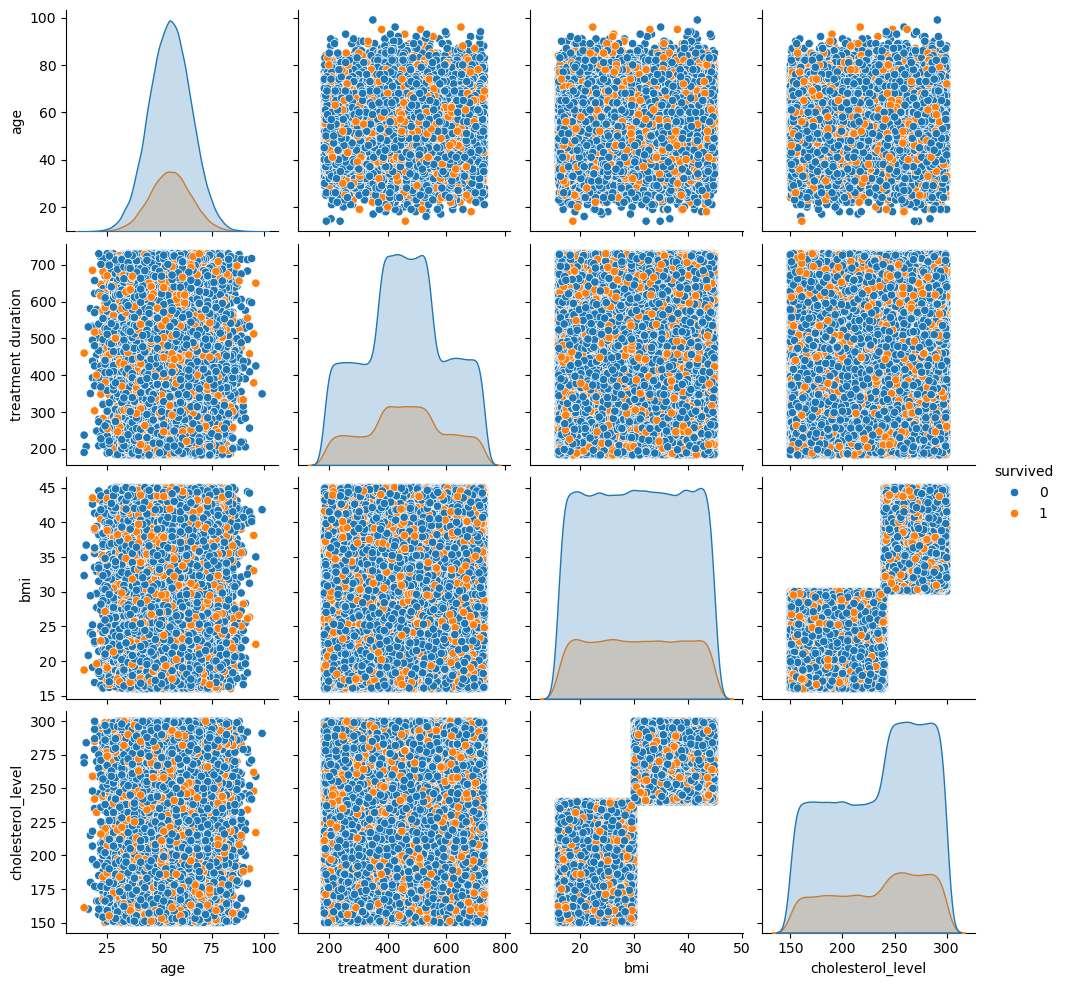

In [28]:
df_numeric = df.select_dtypes(include="number").columns
sns.pairplot(df,vars=df_numeric,hue='survived')


<Axes: xlabel='survived', ylabel='count'>

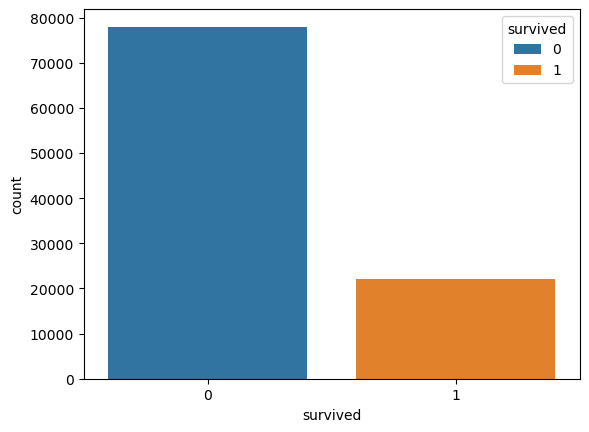

In [28]:
#df.survived.value_counts().plot(kind='bar')
sns.countplot(data=df,x='survived',hue='survived')

In [29]:
df.reset_index(drop=True, inplace=True)
df.head()

,age,gender,treatment duration,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,37.0,Male,594,Stage II,No,Current Smoker,34.5,241,0,0,0,0,Surgery,0
1,63.0,Female,618,Stage III,No,Passive Smoker,22.2,162,1,1,0,0,Combined,0
2,63.0,Female,565,Stage III,No,Former Smoker,22.8,230,0,0,1,0,Combined,1
3,71.0,Male,623,Stage II,No,Never Smoked,32.1,293,0,0,0,0,Chemotherapy,1
4,45.0,Female,576,Stage I,No,Current Smoker,29.0,173,1,0,0,0,Surgery,0


In [36]:
stages = {'Stage II':2.0, 'Stage III':3.0, 'Stage I':1.0, 'Stage IV':4.0}
df['cancer_stage'] = df['cancer_stage'].map(lambda row : stages[row])

In [40]:
genders = {'Male':1.0,'Female':0.0}
df['gender'] = df['gender'].map(lambda row : genders[row])

In [43]:
history = {'No':0.0, 'Yes':1.0}
df['family_history'] = df['family_history'].map(lambda row : history[row])

In [44]:
df.head()

,age,gender,treatment duration,cancer_stage,family_history,smoking_status,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,treatment_type,survived
0,37.0,1.0,594,2.0,0.0,Current Smoker,34.5,241,0,0,0,0,Surgery,0
1,63.0,0.0,618,3.0,0.0,Passive Smoker,22.2,162,1,1,0,0,Combined,0
2,63.0,0.0,565,3.0,0.0,Former Smoker,22.8,230,0,0,1,0,Combined,1
3,71.0,1.0,623,2.0,0.0,Never Smoked,32.1,293,0,0,0,0,Chemotherapy,1
4,45.0,0.0,576,1.0,0.0,Current Smoker,29.0,173,1,0,0,0,Surgery,0


In [48]:
numericas = df.select_dtypes(include=["int64", "float64"]).columns

categoricas = df.select_dtypes(exclude=["number"]).columns

print(numericas)
print(categoricas)

Index(['age', 'gender', 'treatment duration', 'cancer_stage', 'family_history',
       'bmi', 'cholesterol_level'],
      dtype='object')
Index(['smoking_status', 'hypertension', 'asthma', 'cirrhosis', 'other_cancer',
       'treatment_type', 'survived'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical = ["color", "sexo"]
numeric = ["edad"]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(sparse_output=False), categorical),
        ("num", "passthrough", numeric)
    ]
)

X = preprocessor.fit_transform(df)

,age,gender,treatment duration,cancer_stage,family_history,bmi,cholesterol_level,hypertension,asthma,cirrhosis,other_cancer,survived,smoking_status_Current Smoker,smoking_status_Former Smoker,smoking_status_Never Smoked,smoking_status_Passive Smoker,treatment_type_Chemotherapy,treatment_type_Combined,treatment_type_Radiation,treatment_type_Surgery
0,37,1,594,2,0,34,241,0,0,0,0,0,1,0,0,0,0,0,0,1
1,63,0,618,3,0,22,162,1,1,0,0,0,0,0,0,1,0,1,0,0
2,63,0,565,3,0,22,230,0,0,1,0,1,0,1,0,0,0,1,0,0
3,71,1,623,2,0,32,293,0,0,0,0,1,0,0,1,0,1,0,0,0
4,45,0,576,1,0,29,173,1,0,0,0,0,1,0,0,0,0,0,0,1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype   
---  ------              --------------   -----   
 0   age                 100000 non-null  float64 
 1   gender              100000 non-null  float64 
 2   treatment duration  100000 non-null  int64   
 3   cancer_stage        100000 non-null  float64 
 4   family_history      100000 non-null  float64 
 5   smoking_status      100000 non-null  object  
 6   bmi                 100000 non-null  float64 
 7   cholesterol_level   100000 non-null  int64   
 8   hypertension        100000 non-null  category
 9   asthma              100000 non-null  category
 10  cirrhosis           100000 non-null  category
 11  other_cancer        100000 non-null  category
 12  treatment_type      100000 non-null  object  
 13  survived            100000 non-null  category
dtypes: category(5), float64(5), int64(2), object(2)
memory usage: 7.3+ MB

|                            | **Predito 0 (sobrevive)**                       | **Predito 1 (não sobrevive)**               |
| -------------------------- | ----------------------------------------------- | ------------------------------------------- |
| **Real 0 (sobrevive)**     | **TN** (acertos em sobreviver)                  | **FP** (sobreviveu mas foi previsto como 1) |
| **Real 1 (não sobrevive)** | **FN** (não sobreviveu mas foi previsto como 0) | **TP** (acertos em não sobreviver)          |


- nosso objetivo é  minimizar o FN entao a metrica melhor para nosso objetivo é recall

## Random Forest 

In [31]:
from sklearn.ensemble import  RandomForestClassifier

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10]
}

grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=4, scoring='accuracy',n_jobs=-2)
grid.fit(X, y)

- Avaliação de pelo menos dois modelos diferentes;
- Exploração de hiper-parâmetros se aplicável;
- Utilização de validação cruzada para avaliação de desempenho;
- Justificativa da escolha das métricas de avaliação utilizadas (ex:
acurácia, F1-score, erro quadrático médio, etc.);
- Análise crítica dos resultados obtidos, contemplando, por exemplo, os
seguintes aspectos (os termos ficarão claros durante a disciplina, estão
aqui apenas para ilustrar o que é esperado):
   - O modelo foi adequadamente ajustado?
   - Há indícios de overfitting?
   - Os erros estão distribuídos de forma uniforme entre as
classes/dados? Existem padrões?
   - O que as métricas de avaliação revelam sobre o desempenho?
   - A validação cruzada apresenta comportamento consistente? Existem
partições que se destacam por maior erro?
